# Regresión Lineal: Costo de un incidente de Seguridad.

En este ejemplo se explicarán y aplicarán los fundamentos básicos de la regresión lineal, aplicada a un caso de uso sencillo relacioonado con l ciberseguridad.

## Enunciado del ejercicio.

El ejercicio conciste en predecir el costo de un incidente de seguridad en base al número de equipos que se han visto afectados por la inundación de Tula. El conjunto de datos es generado de forma aleatoria

## 1.- Generación del conjunto de datos(Dataset).

In [1]:
import numpy as np 
x=2 * np.random.rand(100,1)
y= 4 + 3 *x + np.random.randn(100,1)
print("La longitud del conjunto de datos es: ", len(x))

La longitud del conjunto de datos es:  100


### 2.- Visualización del Dataset

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

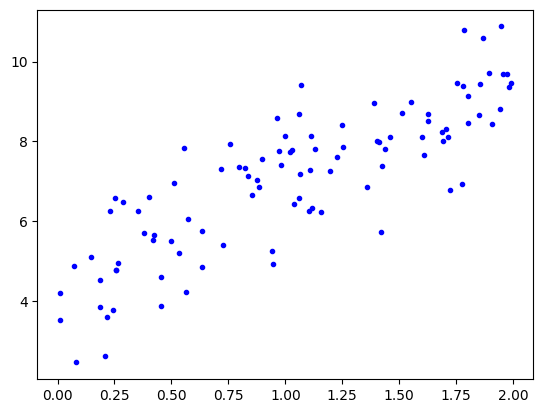

In [3]:
plt.plot(x,y,'b.')
plt.show()

Text(0, 0.5, 'Costo del Incidente (u/10,000)')

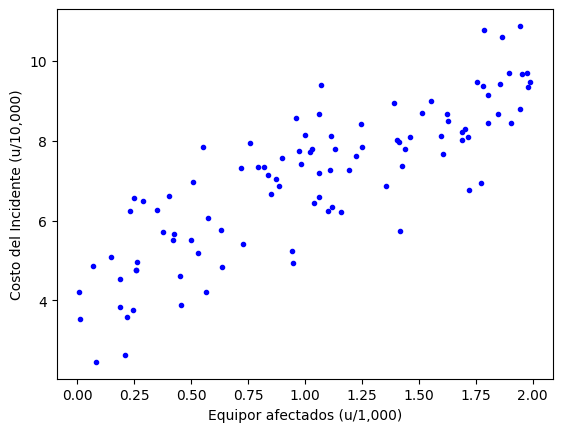

In [4]:
plt.plot(x,y,'b.')
## Etiquetas para la tabla x
plt.xlabel("Equipor afectados (u/1,000)")
## Etiquetas para la tabla y
plt.ylabel("Costo del Incidente (u/10,000)")


### Modificación del conjunto de datos (Dataset)

In [5]:
import pandas as pd


In [6]:
data = {'No._Equipos_Afectados':x.flatten(), 'Costo': y.flatten()}
## Fflatter significa aplanar
df = pd.DataFrame(data)
df.head(10)

,No._Equipos_Afectados,Costo
0,1.803277,8.457471
1,0.256996,4.762807
2,0.402394,6.608638
3,1.714135,8.104306
4,1.459513,8.104162
5,1.774445,6.935520
6,0.244182,3.767597
7,1.031304,7.788543
8,0.884886,6.867709
9,1.114248,8.124332


In [7]:
## Escalado del número de equipos afectados.
df['No._Equipos_Afectados'] = df['No._Equipos_Afectados'] * 1000
df['No._Equipos_Afectados'] = df['No._Equipos_Afectados'].astype('int')
##Escalar el costo
df['Costo'] = df['Costo'] * 1000
df['Costo'] = df['Costo'].astype('int')
df.head(10)

,No._Equipos_Afectados,Costo
0,1803,8457
1,256,4762
2,402,6608
3,1714,8104
4,1459,8104
5,1774,6935
6,244,3767
7,1031,7788
8,884,6867
9,1114,8124


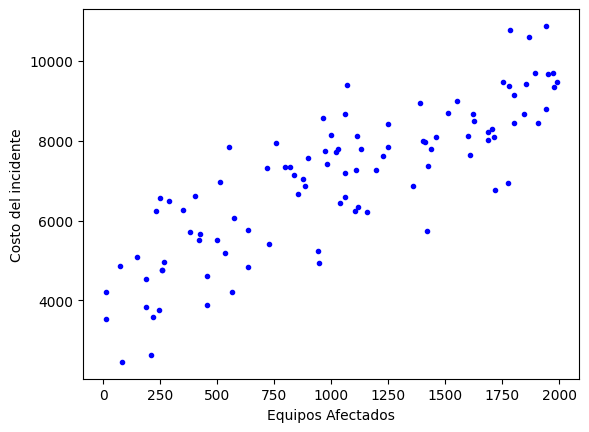

In [8]:
# Representación del conjunto de datos
plt.plot(df['No._Equipos_Afectados'], df['Costo'],'b.')
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del incidente")
plt.show()


In [9]:
from sklearn.linear_model import LinearRegression


In [10]:
# Construccion del modelo y ajuste de la función de hipótesis 
lin_reg= LinearRegression()

lin_reg.fit(df['No._Equipos_Afectados'].values.reshape(-1,1),df['Costo'].values)

LinearRegression()

In [11]:
# Parametro Theta 0
lin_reg.intercept_

4335.241700618008

In [12]:
# Parametro en Theta 1
lin_reg.coef_

array([2.6110531])

In [16]:
# Predicción para el valor mínimo y máximo del conjunto de datos de en
X_min_max = np.array([[df["No._Equipos_Afectados"].min()],[df["No._Equipos_Afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

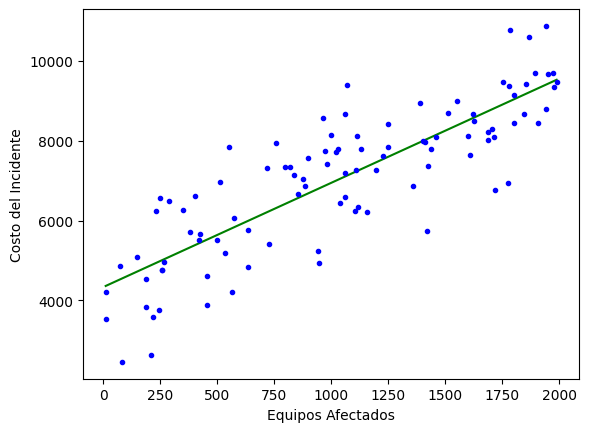

In [17]:
# Representación gráfica de la función hipótesis generada
plt.plot(x_min_max, y_train_pred, 'g-')
plt.plot(df['No._Equipos_Afectados'], df['Costo'], 'b.')
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()

### Predicción de nuevos ejemplos

In [21]:
x_new = np.array([[3000]]) ## 1300 equipos afectados
#Prediccion del costo que tendría el incidente
costo= lin_reg.predict(x_new)
print("El costo del incidente sería $", int(costo[0]), )

El costo del incidente sería $ 12168


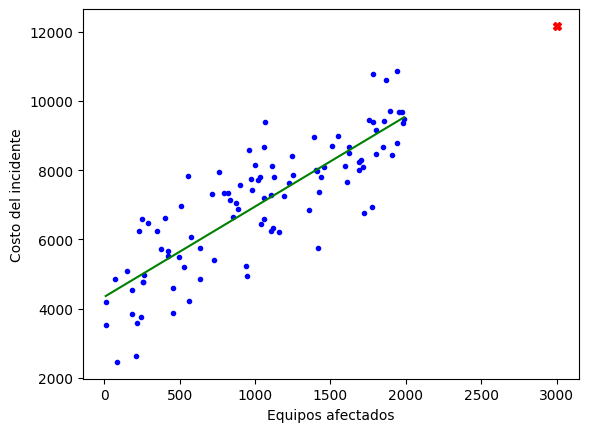

In [24]:
plt.plot(df["No._Equipos_Afectados"], df['Costo'], "b.")
plt.plot(X_min_max, y_train_pred, 'g-')
plt.plot(x_new, costo, 'rX')
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del incidente")
plt.show()